# Informed search algorithms: greedy and A*

## 1. Heuristic in the maze problem: 

### DFS and BFS brute force:

A difference from dfs and bfs that uses brute force to find the solution of the maze that just crawl through the whole maze until they stumble on a solution we use something more cleaver that is the heuristic search.

### What is a heuristic in simple terms:

Heuristics are mental shortcuts that allow people to solve problems and make judgments quickly and efficiently. These rule-of-thumb strategies shorten decision-making time and allow people to function without constantly stopping to think about their next course of action.

### Heuristic Search:

In mathematical optimization and computer science, heuristic is a technique designed for solving a problem more quickly when classic methods are too slow or for finding an approximate solution when classic methods fail to find any exact solution. This is achieved by trading optimality, completeness, accuracy, or precision for speed. In a way, it can be considered a shortcut.

A heuristic function, also simply called a heuristic, is a function that ranks alternatives in search algorithms at each branching step based on available information to decide which branch to follow. For example, it may approximate the exact solution.

h(n) = estimated cost of the cheapest path from node n to goal node. If n is goal then h(n)=0. Its value is independent of the current search tree; it depends only on the state(n) and the goal test.

### Heuristic search algorithms:

Informed search methods have access to a heuristic function h(n) that estimates the cost of a solution from n. They may have access to additional information such as pattern databases with solution costs.

– Greedy best-first search expands nodes with minimal h(n). It is not optimal but
is often efficient.

– A ∗ search expands nodes with minimal f(n) = g(n) + h(n). A∗
is complete and optimal, provided that h(n) is admissible. The space complexity of A∗ is still an issue for many problems.

The best-known of these is A*, but we’ll use the more-human-intuitive “greedy best-first” search. Like breadth-first search, best-first explores multiple paths in parallel. But rather than brute-force searching all the paths, best-first focuses on paths which are closest to the goal “as the bird flies”. Distance from the goal serves as an heuristic to steer the search.

But heuristic search comes with a catch: it’s only as good as the heuristic. If we use straight-line distance from the goal as an heuristic, then heuristic search is going to work well if-and-only-if the solution path is relatively straight. If the solution path wiggles around a lot, especially on a large scale, then heuristic search won’t help much.

The problem with any heuristic search is that it’s only as good as our heuristic. In particular, most heuristics are “local”: like the straight-line distance heuristic, they’re bad at accounting for large-scale problem structure. Without some knowledge of large-scale problem structure, local heuristics will lead us down many dead ends. Eventually, when we find the “right” solution, we realize in hindsight that we weren’t really solving the right problem, in some intuitive sense — more on that later.

### Greedy best-first search:
• Evaluation function f(n) = h(n) (heuristic) = estimate of cost from n to goal. 

• hSLD(n) = straight-line distance from n
to Bucharest

• Greedy best-first search expands the node that appears to be closest to goal

### A* search:

Avoid expanding paths that are already expensive.

• Combines the two evaluation functions (of
UCS and GBFS) by summing them up

• Evaluation function f(n) = g(n) + h(n):

– g(n) = cost (so far) from start node to reach n.

– h(n) = estimated cost to get from n to goal.

– f(n) = estimated total cost of cheapest path solution through n to goal   


##  2. The greedy search algorithm

Greedy is an algorithmic paradigm that builds up a solution piece by piece, always choosing the next piece that offers the most obvious and immediate benefit. So the problems where choosing locally optimal also leads to global solution are the best fit for Greedy.
The algorithm never reverses the earlier decision even if the choice is wrong. It works in a top-down approach.

GBFS is a modification of the best-first search algorithm that was first proposed by a computer scientist called Judea Pearl. GBFS is described as a search algorithm that always expands nodes with the smallest heuristic value h(n). the heuristic value h(n) refers to the distance from the node n to the goal. This distance is known as the Euclidean or Manhattan distance. GBFS keeps track of possible nodes to expand in an open list and nodes which were already expanded in a closed set. GBFS then selects the next node, that is, the node with the lowest h(n) value and expands it by inserting all successors into the open list. This process is repeated until GBFS encounters a node which is the goal.

However, we can determine if the algorithm can be used with any problem if the problem has the following properties:

#### 1. Greedy Choice Property

If an optimal solution to the problem can be found by choosing the best choice at each step without reconsidering the previous steps once chosen, the problem can be solved using a greedy approach. This property is called greedy choice property.

#### 2. Optimal Substructure

If the optimal overall solution to the problem corresponds to the optimal solution to its subproblems, then the problem can be solved using a greedy approach. This property is called optimal substructure.

#### Properties of greedy best-first search
• Complete? No – can get stuck in loops.

• Time? O(b^m), but a good heuristic can give dramatic improvement.

• Space? O(b^m), keeps all nodes in memory

• Optimal? No




In [9]:
from IPython.display import Image
Image(url="https://repository-images.githubusercontent.com/360516784/d5b2c16e-d874-41ae-8584-9f3f548fd631",width=500, height=400)

In [1]:
#CODE OF GREEDYPATH
class GreedyPath:
    Alto = 0
    Ancho = 0
    y = 1
    validPositions = None

    verticalStep = None
    horizontalStep = None


    #the agent has a starting point
    #and an objective
    def __init__(self,startPoint,objective, alto, ancho, size, ValidPositions):

        GreedyPath.Alto = alto
        GreedyPath.Ancho = ancho
        GreedyPath.y = size
        GreedyPath.validPositions = ValidPositions.copy()

        GreedyPath.horizontalStep = GreedyPath.Ancho/GreedyPath.y
        GreedyPath.verticalStep = GreedyPath.Alto/GreedyPath.y

        #adjust the starting point to the coordinate system
        self.start = startPoint
        self.objective = objective

        #Set the agent's currrent position to the start
        self.actualPosition = self.start

        #Start a stack to store the actual path
        self.actualPath = collections.deque()
        #And add the actual position (start) to the stack
        self.actualPath.append(self.actualPosition)

        #also, a stack to add the instructions
        #"up","down","left","right" (always lowercase)
        self.directions = collections.deque()



    #obtain the adjacent valid positions to a given position
    def adjacentPositions(self,position):
        adjacent = []
        adjacent.append(((tuple(np.subtract(position,(GreedyPath.verticalStep,0)))),"up"))
        adjacent.append(((tuple(np.add(position,(GreedyPath.verticalStep,0)))),"down"))
        adjacent.append(((tuple(np.subtract(position,(0,GreedyPath.horizontalStep)))),"left"))
        adjacent.append(((tuple(np.add(position,(0,GreedyPath.horizontalStep)))),"right"))


        ind = 0
        while ind < len(adjacent):
            if adjacent[ind][0] not in GreedyPath.validPositions:
                adjacent.remove(adjacent[ind])
                ind-=1
            ind+=1

        return adjacent


    #check if the actual position is the objective
    def CheckObjective(self):
        return (self.actualPosition == self.objective)


    #Calculate manhattan distance from a point to the objective
    def calcDistanceToObjective(self,position):
        difference = np.subtract(self.objective,position)
        distance = abs(difference[0]) + abs(difference[1])
        return distance


    def explore(self):
        """
        Function to explore

        returns:
            0 (still exploring)
            1 (found the objective)
            -1 (ran out of valid positions and asumes the objective is unreachable)
        """

        #check if we have reached the objective yet
        #if not
        if not self.CheckObjective():

            #take the adjacent valid positions
            adjacents = self.adjacentPositions(self.actualPosition)

            #if the list isn't void (there's at least one
            #adjacent valid position)
            if len(adjacents) != 0:

                #initialize a variable to store minimum distance
                #and the position corresponding to it
                minDistance = math.inf
                minPosition = None

                #for each position
                for pos in adjacents:

                    #if the manhattan distance from it to the objective
                    #is lesser than our current minimum position
                    dist = self.calcDistanceToObjective(pos[0])
                    if  dist < minDistance:

                        #set this position and its distance as minimums
                        minDistance = dist
                        minPosition = pos

                #change the actual position to the position with the minimum distance
                self.actualPosition = minPosition[0]

                #remove our actual position from the list of valid positions
                #to avoid loops
                GreedyPath.validPositions.remove(self.actualPosition)

                #append the direction we took to the direction list
                self.directions.append(minPosition[1])

                #and the position we are to our path
                self.actualPath.append(minPosition[0])


            #if there's no adjacent valid position
            else:
                #check if the path is not void (we aren't in the start)
                if self.actualPath:

                    #take out the last position
                    self.actualPath.pop()

                    #"take one step back"
                    #(change position to the last position in the path)
                    if self.actualPath:
                        self.actualPosition = self.actualPath[-1]

                    #if our actualPath is empty
                    #we ran out of options
                    else:
                        return -1

                #remove the last direction taken
                if self.directions:
                    self.directions.pop()

            return 0

        #if we are in our objective
        else:
            print("Objective found")
            print("Path:")
            for action in self.directions:
                print(action)

            return 1

GBFS is a search algorithm that opens all connected nodes and goes to the cheapest node based on the heuristic value of that node. Every time new nodes are discovered they are added to the (search database) or in other words a table that contains all known nodes. GBFS will then always go to the cheapest node in that search database. Lets do an example on the search path on this Heuristic search tree with GBFS: Let us see how this works for route-finding problems in Romania; we use the straight line distance heuristic, which we will call hSLD. If the goal is Bucharest, we need to know the straight-line distances to Bucharest, which are shown in the figute shown below For example, hSLD(Arad)=366. Notice that the values of hSLD cannot be computed from the problem description itself (that is, the ACTIONS and RESULT functions). Moreover, it takes a certain amount of world knowledge to know that hSLD is correlated with actual road distances and is, therefore, a useful heuristic.


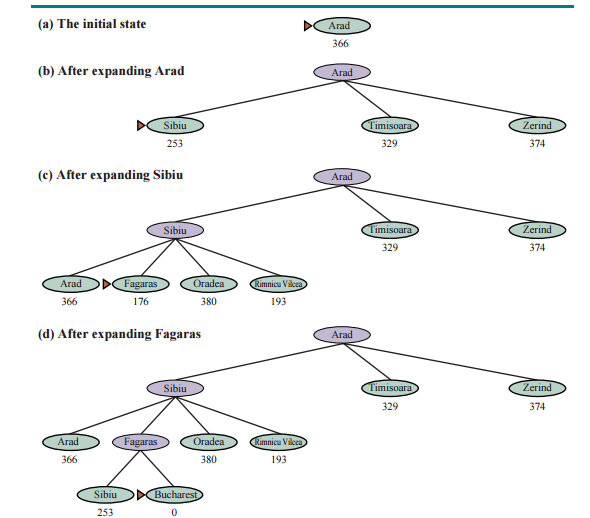

In [7]:
from IPython.display import Image
Image('Images\Greedybfs.png')

This is why the algorithm is called “greedy”—on each iteration it tries to get as close to a goal as it can,but greediness can lead to worse results than being careful.Greedy best-first graph search is complete in finite state spaces, but not in infinite ones.
The worst-case time and space complexity is O(|V|). With a good heuristic function, however,
the complexity can be reduced substantially, on certain problems reaching O(bm).


##  3. The A* search algorithm:

The A* (A-Star) search algorithm is one of the most commonly used algorithms for path planning. It relies mainly on brute force and heuristics to find the least costly route between the two points. The A* search algorithm was first published in 1968 by Stanford researchers as part of the Shakey the robot project. They wanted an improved version of the Dijkstra algorithm that uses a heuristic function to minimize the cost of movement and plan a path for the robot to navigate autonomously around corridors and different rooms in a building. Like some kind of ancient Roomba, it used several distance sensors and physical “bumper” sensors to detect nearby obstacles and build up a local map for navigation.

The most common informed search algorithm is A∗search (pronounced “A-star search”), a A∗ search best-first search that uses the evaluation function: f(n) = g(n) +h(n), where g(n) is the path cost from the initial state to node n, and h(n) is the estimated cost of the shortest path from n to a goal state, so we have f(n)= estimated cost of the best path that continues from n to a goal.


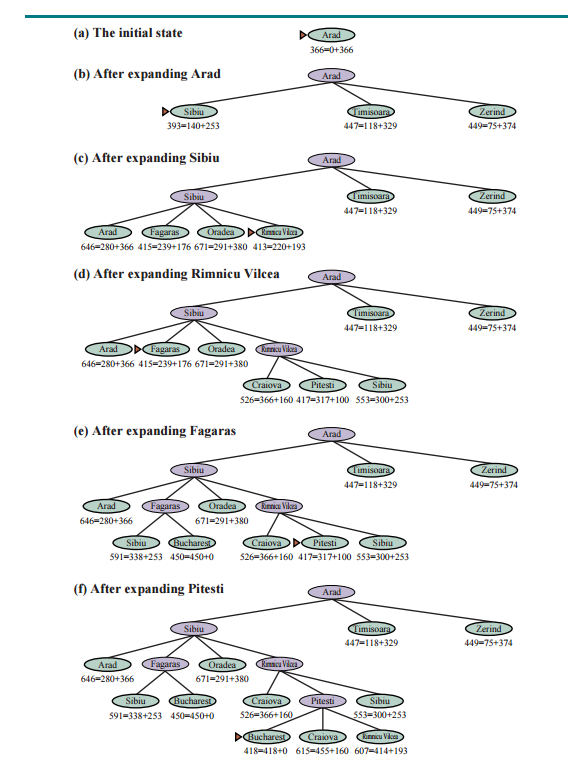

In [10]:
from IPython.display import Image
Image('Images\A.png')

Thus, if we are trying to find the cheapest solution, a reasonable thing to try first is the node with the lowest value of g(n) + h(n). It turns out that this strategy is more than just reasonable: provided that the heuristic function h(n) satisfies certain conditions, A∗ search is both complete and optimal. The algorithm is identical to UNIFORM-COST-SEARCH except that A∗ uses g + h instead of g.


### Conditions for optimality: Admissibility and consistency

The first condition we require for optimality is that h(n) be an admissible heuristic. An ADMISSIBLE HEURISTIC admissible heuristic is one that never overestimates the cost to reach the goal. Because g(n) is the actual cost to reach n, and f(n) = g(n) + h(n), we have as immediate consequence that f(n) never overestimates the true cost of a solution through n. Admissible heuristics are by nature optimistic, because they think the cost of solving the problem is less than it actually is. An obvious example of an admissible heuristic is the straight-line distance hSLD that we used in getting to Bucharest. Straight-line distance is admissible because the shortest path between any two points is a straight line, so the straight line cannot be an overestimate. In the figure shown above, we show the progress of an A∗ tree search for Bucharest. 

#### Properties of A*
• Completeness: Yes

• Time complexity: exponential with path length

• Space complexity: all nodes are stored

• Optimality: Yes

– Cannot expand f_i+1 until f_i is finished.

– A* expands all nodes with f(n)< C*

– A* expands some nodes with f(n)=C*

– A* expands no nodes with f(n)>C*


In [ ]:
class AstarNode:

    """
    g = cost for going from the start to this node's position
    h = (aproximate) cost from the node to the objective
    """
    def __init__(self,position,directions,actualPath,g,h):
        self.position = position
        self.directions = directions
        self.actualPath = actualPath
        self.g = g
        self.h = h


        self.f = g+h

    def __lt__(self,other):
        return self.f < other.f

    def __le__(self,other):
        return self.f <= other.f

    def __gt__(self,other):
        return self.f > other.f

    def __ge__(self,other):
        return self.f >= other.f

    def __eq__(self,other):
        return self.f == other.f
class AstarPath:

    Alto = 0
    Ancho = 0
    y = 1
    validPositions = None

    verticalStep = None
    horizontalStep = None


    #the agent has a starting point
    #and an objective
    def __init__(self,startPoint,objective, alto, ancho, size, ValidPositions):

        AstarPath.Alto = alto
        AstarPath.Ancho = ancho
        AstarPath.y = size
        AstarPath.validPositions = ValidPositions

        AstarPath.horizontalStep = AstarPath.Ancho/AstarPath.y
        AstarPath.verticalStep = AstarPath.Alto/AstarPath.y


        #adjust the starting point to the coordinate system
        self.start = startPoint
        self.objective = objective

        self.validPositions = AstarPath.validPositions.copy()
        self.validPositions.remove(self.start)

        self.fringe = PriorityQueue()

        dist = self.calcDistanceToObjective(self.start)
        self.fringe.put(AstarNode(self.start,[],[self.start],0,dist))



    def CheckObjective(self,position):
        return (position == self.objective)


    #Calculate manhattan distance from a point to the objective
    def calcDistanceToObjective(self,position):
        difference = np.subtract(self.objective,position)
        distance = abs(difference[0]) + abs(difference[1])
        return distance


    #functions to check if it can move
    def tryUp(self,position):

        #calculate the next move of a given node
        nextMove = tuple(np.subtract(position,(AstarPath.verticalStep,0)))

        #check if the position is in the list of valid Positions
        validMove = nextMove in self.validPositions

        return validMove

    def tryDown(self,position):
        nextMove = tuple(np.add(position,(AstarPath.verticalStep,0)))

        validMove = nextMove in self.validPositions

        return validMove

    def tryLeft(self,position):
        nextMove = tuple(np.subtract(position,(0,AstarPath.horizontalStep)))

        validMove =  nextMove in self.validPositions

        return validMove

    def tryRight(self,position):
        nextMove = tuple(np.add(position,(0,AstarPath.horizontalStep)))

        validMove = nextMove in self.validPositions


        return validMove


    def explore(self):
        """
        Function to explore

        returns:
            0 (still exploring)
            1 (found the objective)
            -1 (ran out of valid positions and asumes the objective is unreachable)
        """
        if not self.fringe.empty():

            #get the highest priority item
            item = self.fringe.get()

            #if it isn't in the objective
            if not self.CheckObjective(item.position):

                    #check if it can move up
                if self.tryUp(item.position):

                    #calculate the new position
                    newPosition = tuple(np.subtract(item.position,(AstarPath.verticalStep,0)))
                    self.validPositions.remove(newPosition)

                    #create a new node
                    #remember to pass a copy of directions and path
                    #not the originals
                    distance = self.calcDistanceToObjective(newPosition)
                    newNode = AstarNode(newPosition,item.directions.copy(),item.actualPath.copy(),item.g+1,distance)

                    #add the instruction to this new node's directions
                    newNode.directions.append("up")
                    newNode.actualPath.append(newPosition)


                    #add the node to the queue
                    self.fringe.put(newNode)

                if self.tryLeft(item.position):
                    newPosition = tuple(np.subtract(item.position,(0,AstarPath.horizontalStep)))
                    self.validPositions.remove(newPosition)

                    distance = self.calcDistanceToObjective(newPosition)
                    newNode = AstarNode(newPosition,item.directions.copy(),item.actualPath.copy(),item.g+1,distance)

                    newNode.directions.append("left")
                    newNode.actualPath.append(newPosition)

                    self.fringe.put(newNode)

                if self.tryDown(item.position):
                    newPosition = tuple(np.add(item.position,(AstarPath.verticalStep,0)))
                    self.validPositions.remove(newPosition)

                    distance = self.calcDistanceToObjective(newPosition)
                    newNode = AstarNode(newPosition,item.directions.copy(),item.actualPath.copy(),item.g+1,distance)

                    newNode.directions.append("down")
                    newNode.actualPath.append(newPosition)

                    self.fringe.put(newNode)

                if self.tryRight(item.position):
                    newPosition = tuple(np.add(item.position,(0,AstarPath.horizontalStep)))
                    self.validPositions.remove(newPosition)

                    distance = self.calcDistanceToObjective(newPosition)
                    newNode = AstarNode(newPosition,item.directions.copy(),item.actualPath.copy(),item.g+1,distance)

                    newNode.directions.append("right")
                    newNode.actualPath.append(newPosition)

                    self.fringe.put(newNode)

                return 0


            #if we are in the objective
            else:
                print("Objective found")
                print("Path:")

                for action in item.directions:
                    print(action)

                return item, self.fringe.queue.copy()


        return -1

## 4. Admissible heuristic:

Admissible heuristics are used to estimate the cost of reaching the goal state in a search algorithm. Admissible heuristics never overestimate the cost of reaching the goal state. The use of admissible heuristics also results in optimal solutions as they always find the cheapest path solution.

For a heuristic to be admissible to a search problem, needs to be lower than or equal to the actual cost of reaching the goal.

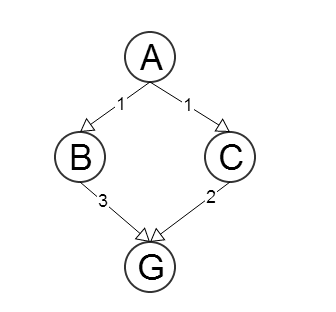

In [11]:
from IPython.display import Image
Image('Images\Admissible heuristic.png')

In the A* search algorithm, the evaluation function (where n is the current node) is:

f(n)=g(n)+h(n)

where

f(n) = evaluation function.

g(n) = cost from start node to current node

h(n) = estimated cost from current node to goal

Here, h(n) gets calculated with the use of the heuristic function. If a non-admissible heuristic was used, it is possible that the algorithm would not reach the optimal solution because of an overestimation in the evaluation function.

An admissible heuristic is a non-negative function h of nodes, where  h(n) is never greater than the actual cost of the shortest path from node 
n to a goal. The standard way to construct a heuristic function is to find a solution to a simpler problem, which is one with fewer constraints. A problem with fewer constraints is often easier to solve (and sometimes trivial to solve). An optimal solution to the simpler problem cannot have a higher cost than an optimal solution to the full problem because any solution to the full problem is a solution to the simpler problem.

In many spatial problems where the cost is distance and the solution is constrained to go via predefined arcs (e.g., road segments), the straight-line Euclidean distance between two nodes is an admissible heuristic because it is the solution to the simpler problem where the agent is not constrained to go via the arcs.

### The Admissibility of A*

##### Definition: A heuristic is admissible if it never overestimates the cost to the goal (the heuristic is always optimistic; h(n) ≤ h∗(n) ∀n ∈ N).
##### Theorem: If the heuristic is admissible, A* is always optimal (finds anoptimal solution).


Here we want to prove that, in fact, algorithm A is admissible. That is, If the heuristic function used by A* is admissible, it will terminate in finding an optimal path to a goal node if a path from start to a goal exists. In particular:

Given a graph search which does algorithm A search - if I can guarantee that the heuristic function has the property h(n) <= h'(n) for all nodes n (so that my heuristic function which estimates the cost from a given node to a goal is actually a lower bound on the actual cost to the goal), then the algorithm as given is guaranteed to find an optimal solution (if a path from start to a goal exists).

##### Proof:
Let C∗ be the cost of the optimal path to goal state G and let’s assume that the A∗ algorithm found a suboptimal path with cost C' > C∗.

In the open list of the algorithm, there must be a node that is on the optimal path from the starting state to the goal (denote it n). 

f (n) = h(n) + g(n) ≤ h∗(n) + g(n) ≤ C∗ < C' therefore, node n should have been selected for the expansion before goal state G reached via suboptimal path.

But, what if the algorithm reaches the same state multiple times ... can we discard the next visits or does the algorithm need to re-evaluate already closed states?


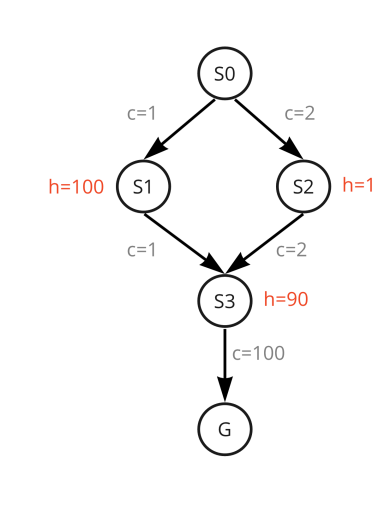

In [12]:
from IPython.display import Image
Image('Images\AdmissibleHeuristic2.png')

The algorithm explores:

-s2; f (s2) = 2 + 1 → s3 added to fringe

-s3; f (s3) = 4 + 90 → G added to fringe

-s1; f (s1) = 1 + 100 → s3?

The algorithm cannot dismiss it as already solved since it found a better path to s3. Otherwise, the algorithm would miss the optimal path s0 → s1 → s3 → G.

It is safe to discard already explored state if the cost of the new path is greater or equal than the cost with which the state has been explored.
